In [6]:
import numpy as np
from numpy import *
from collections import defaultdict
import matplotlib.pyplot as plt
import json
import os

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


baseline_mode = 'level_3'
baseline_data_path = 'sample_baseline_data'
exp_data_path = "sample_exp_data"

if not os.path.exists('figures'):
    os.makedirs('figures')

In [7]:
benchmarks = ['qft', 'qaoa', 'vqe', 'bv']
sparsity = None
additional_comment = ''
if sparsity is not None:
    additional_comment = '_sparsity{}'.format(sparsity)
baseline_mode_comment = ''
if baseline_mode == 'level_3':
    baseline_mode_comment = '_level_3'

def read_data(baseline_file_name, exp_file_name, depth_or_cnots, cross_chip_weight=7.4, meas_weight=2.2):
    baseline_file_path = os.path.join(baseline_data_path, baseline_file_name)
    exp_file_path = os.path.join(exp_data_path, exp_file_name)
    print(baseline_file_path)
    print(exp_file_path)
    data_ratio = []
    with open(exp_file_path, 'r') as json_file:
        exp_data = json.load(json_file)
    with open(baseline_file_path, 'r') as json_file:
        baseline_data = json.load(json_file)[baseline_mode]
    if depth_or_cnots == 'depth':
        for b in benchmarks:
            print(b, baseline_data[b]['depth'], exp_data[b]['depth'])
            data_ratio.append(exp_data[b]['depth'] / baseline_data[b]['depth'])
    if depth_or_cnots == 'cnot':
        for b in benchmarks:
            exp_eff_cnot = exp_data[b]['on-chip'] + exp_data[b]['cross-chip'] * cross_chip_weight + exp_data[b]['meas_num'] * meas_weight
            baseline_eff_cnot = baseline_data[b]['on-chip'] + baseline_data[b]['cross-chip'] * cross_chip_weight
            print(b, baseline_eff_cnot, exp_eff_cnot)
            data_ratio.append(exp_eff_cnot / baseline_eff_cnot)
    return data_ratio

sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3377.json
qft 32086.2 11189
qaoa 22756.8 9735
vqe 26277.0 10181
bv 596.8 34
sample_baseline_data/squ3377_sparsity3_level_3.json
sample_exp_data/squ3377.json
qft 36784.8 11189
qaoa 23412.6 9735
vqe 30380.0 10181
bv 574.6 34
sample_baseline_data/squ3377_sparsity1_level_3.json
sample_exp_data/squ3377.json
qft 37877.6 11189
qaoa 25168.2 9735
vqe 31791.6 10181
bv 615.4 34


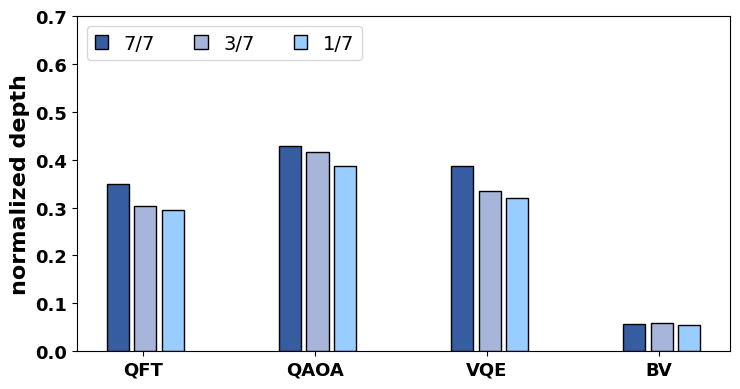

sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3377.json
qft 582499.76 451553.2
qaoa 389773.4 300847.2
vqe 471148.24 385647.0
bv 1710.8000000000002 1415.1999999999998
sample_baseline_data/squ3377_sparsity3_level_3.json
sample_exp_data/squ3377.json
qft 533186.72 451553.2
qaoa 368526.28 300847.2
vqe 439476.16000000003 385647.0
bv 1525.04 1415.1999999999998
sample_baseline_data/squ3377_sparsity1_level_3.json
sample_exp_data/squ3377.json
qft 511702.4 451553.2
qaoa 370093.2 300847.2
vqe 429400.48 385647.0
bv 1597.12 1415.1999999999998


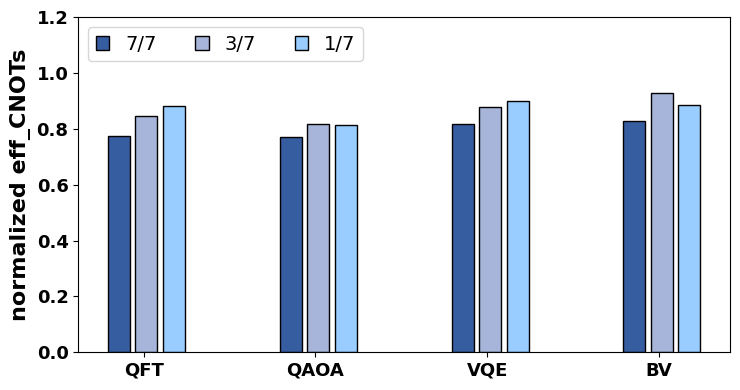

In [8]:
def draw_bar_plot_for_sparsity(depth_or_cnots, baseline_mode_comment):
    if depth_or_cnots == 'depth':
        y_label = 'normalized depth'
        y_lim = 0.7
    if depth_or_cnots == 'cnot':
        y_label = 'normalized eff_CNOTs'
        y_lim = 1.2
    n_groups = 4
    name = ['QFT','QAOA','VQE','BV']

    ratios = []
    for sparsity in [None,3,1]:
        additional_comment = ''
        if sparsity is not None:
            additional_comment = '_sparsity{}'.format(sparsity)
        baseline_file_name = "squ3377{}{}.json".format(additional_comment, baseline_mode_comment)
        exp_file_name = "squ3377.json"
        ratio_data = read_data(baseline_file_name, exp_file_name, depth_or_cnots)
        ratios.append(ratio_data)

    norms = []
    for ratio in ratios:
        norms.append(ratio[:n_groups])

    fig, ax = plt.subplots(figsize=(7.5, 4))
    index = np.arange(n_groups) / 1.6
    bar_width = 0.08
    gap_width = 0.02
    tot_width = bar_width + gap_width
        
    plt.bar(index-0.5*tot_width, norms[0], bar_width, alpha=1, color='#375DA1', edgecolor='black', label='7/7')
    plt.bar(index+0.5*tot_width, norms[1], bar_width, alpha=1, color='#A7B5DB', edgecolor='black', label='3/7')
    plt.bar(index+1.5*tot_width, norms[2], bar_width, alpha=1, color='#99CCFF', edgecolor='black', label='1/7')

    plt.xticks(index + bar_width*0.5, name, fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')
    plt.ylim([0, y_lim])

    plt.legend(fontsize=14, loc='upper left', handlelength=0.7, ncol=4)
    ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('./figures/sparsity_{}.pdf'.format(depth_or_cnots))
    plt.show()

draw_bar_plot_for_sparsity('depth', baseline_mode_comment)
draw_bar_plot_for_sparsity('cnot', baseline_mode_comment)

squ2399_level_3.json squ2399.json
sample_baseline_data/squ2399_level_3.json
sample_exp_data/squ2399.json
qft 41387.0 15755
qaoa 30085.4 12401
vqe 34155.8 14183
bv 716.8 37
squ2399_366qubit_level_3.json squ2399_lane2.json
sample_baseline_data/squ2399_366qubit_level_3.json
sample_exp_data/squ2399_lane2.json
qft 34619.0 9675
qaoa 23910.4 8647
vqe 28308.4 9030
bv 590.2 25
squ2399_288qubit_level_3.json squ2399_lane3.json
sample_baseline_data/squ2399_288qubit_level_3.json
sample_exp_data/squ2399_lane3.json
qft 21196.4 6443
qaoa 17787.6 5824
vqe 17284.2 5435
bv 459.6 19


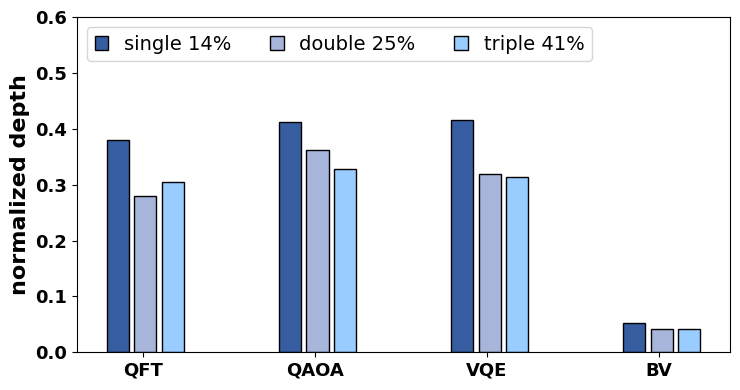

squ2399_level_3.json squ2399.json
sample_baseline_data/squ2399_level_3.json
sample_exp_data/squ2399.json
qft 682868.48 670592.0
qaoa 481565.2 407024.2
vqe 554494.48 574201.2
bv 1832.4 1695.0
squ2399_366qubit_level_3.json squ2399_lane2.json
sample_baseline_data/squ2399_366qubit_level_3.json
sample_exp_data/squ2399_lane2.json
qft 529677.28 391056.2
qaoa 357079.2 276402.4
vqe 428244.19999999995 324172.2
bv 1527.92 1281.8000000000002
squ2399_288qubit_level_3.json squ2399_lane3.json
sample_baseline_data/squ2399_288qubit_level_3.json
sample_exp_data/squ2399_lane3.json
qft 328901.72 279109.80000000005
qaoa 225642.24 195950.40000000002
vqe 264842.2 237781.80000000002
bv 1165.08 1159.0


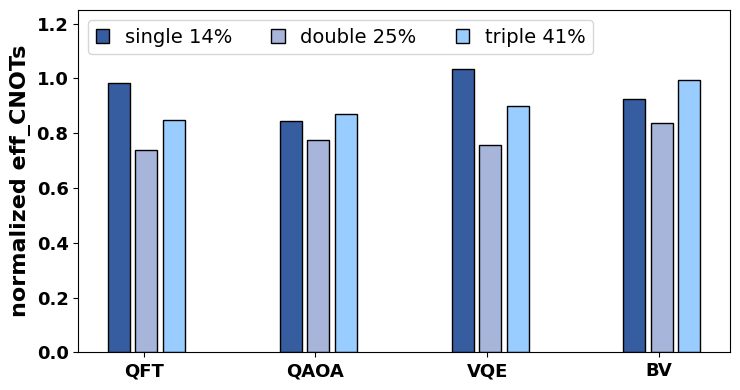

In [9]:
def draw_bar_plot_for_highway_percentage(depth_or_cnots):
    if depth_or_cnots == 'depth':
        y_label = 'normalized depth'
        y_lim = 0.6
    if depth_or_cnots == 'cnot':
        y_label = 'normalized eff_CNOTs'
        y_lim = 1.25
    n_groups = 4
    name = ['QFT','QAOA','VQE','BV']

    ratios = []
    baseline_file_names = ["squ2399{}.json".format(baseline_mode_comment), "squ2399_366qubit{}.json".format(baseline_mode_comment), "squ2399_288qubit{}.json".format(baseline_mode_comment)]
    exp_file_names = ["squ2399.json", "squ2399_lane2.json", "squ2399_lane3.json"]

    # baseline_file_names = ["sq3399{}.json".format(baseline_mode_comment), "sq3399_549qubit{}.json".format(baseline_mode_comment), "sq3399_432qubit{}.json".format(baseline_mode_comment)]
    # exp_file_names = ["sq3399.json", "sq3399_lane2.json", "sq3399_lane3.json"]
    for i in range(3):
        print(baseline_file_names[i], exp_file_names[i])
        ratio_data = read_data(baseline_file_names[i], exp_file_names[i], depth_or_cnots)
        ratios.append(ratio_data)

    norms = []
    for ratio in ratios:
        norms.append(ratio[:n_groups])
        
    fig, ax = plt.subplots(figsize=(7.5, 4))
    index = np.arange(n_groups) / 1.6
    bar_width = 0.08
    gap_width = 0.02
    tot_width = bar_width + gap_width
        
    plt.bar(index-0.5*tot_width, norms[0], bar_width, alpha=1, color='#375DA1', edgecolor='black', label='single 14%')
    plt.bar(index+0.5*tot_width, norms[1], bar_width, alpha=1, color='#A7B5DB', edgecolor='black', label='double 25%')
    plt.bar(index+1.5*tot_width, norms[2], bar_width, alpha=1, color='#99CCFF', edgecolor='black', label='triple 41%')

    plt.xticks(index + bar_width*0.5, name, fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')
    plt.ylim([0, y_lim])

    plt.legend(fontsize=14, loc='upper left', handlelength=0.7, ncol=4)
    ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('./figures/bandwidth_{}.pdf'.format(depth_or_cnots))
    plt.show()

draw_bar_plot_for_highway_percentage('depth')
draw_bar_plot_for_highway_percentage('cnot')

sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3377.json
qft 32086.2 11189
qaoa 22756.8 9735
vqe 26277.0 10181
bv 596.8 34
sample_baseline_data/hex2388_level_3.json
sample_exp_data/hex2388.json
qft 32803.2 10727
qaoa 20357.0 9098
vqe 27677.6 9803
bv 557.8 34
sample_baseline_data/hea_squ3388_level_3.json
sample_exp_data/hea_squ3388.json
qft 50526.6 15386
qaoa 26608.0 11832
vqe 43300.6 14433
bv 663.8 45
sample_baseline_data/hea_hex3488_level_3.json
sample_exp_data/hea_hex3488.json
qft 47294.6 13664
qaoa 26412.8 11359
vqe 41572.0 12988
bv 740.0 39


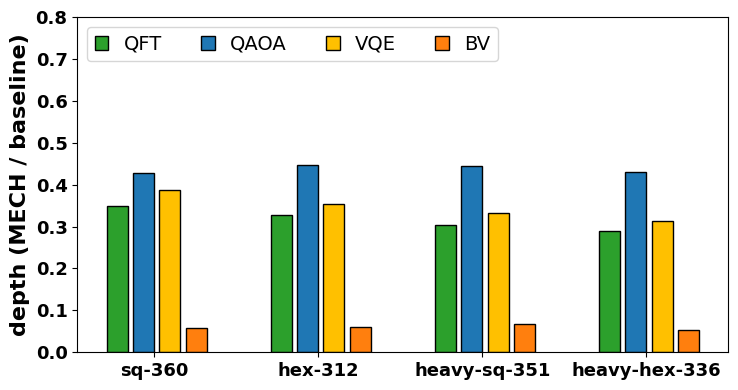

sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3377.json
qft 582499.76 451553.2
qaoa 389773.4 300847.2
vqe 471148.24 385647.0
bv 1710.8000000000002 1415.1999999999998
sample_baseline_data/hex2388_level_3.json
sample_exp_data/hex2388.json
qft 451789.72 333005.2
qaoa 311759.76 214178.4
vqe 376972.28 282938.60000000003
bv 1359.24 1100.2
sample_baseline_data/hea_squ3388_level_3.json
sample_exp_data/hea_squ3388.json
qft 664441.6000000001 437151.8
qaoa 454275.36000000004 287234.8
vqe 565241.24 375853.60000000003
bv 1688.8400000000001 1443.3999999999999
sample_baseline_data/hea_hex3488_level_3.json
sample_exp_data/hea_hex3488.json
qft 726879.24 432312.8
qaoa 504897.24 283101.4
vqe 630141.0 376101.0
bv 1840.48 1313.0


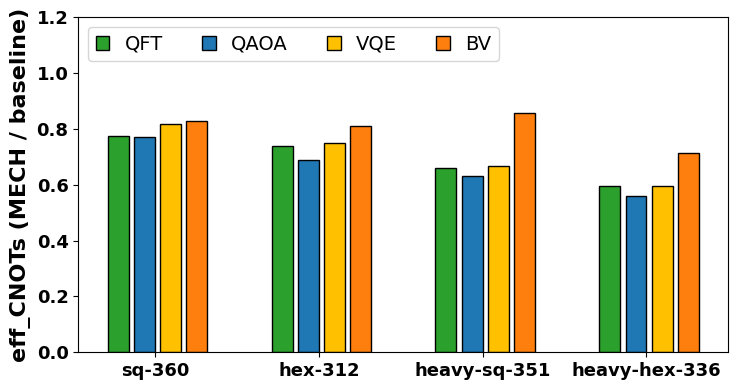

In [10]:
def draw_bar_plot_for_structure(depth_or_cnots, baseline_mode_comment):
    if depth_or_cnots == 'depth':
        y_label = 'depth (MECH / baseline)'
        y_lim = 0.8
    if depth_or_cnots == 'cnot':
        y_label = 'eff_CNOTs (MECH / baseline)'
        y_lim = 1.2
    n_groups = 4
    name = ['sq-360', 'hex-312', 'heavy-sq-351', 'heavy-hex-336']


    ########## square ##########
    baseline_file_name = "squ3377{}{}.json".format('', baseline_mode_comment)
    exp_file_name = "squ3377.json"
    dense_sqr = read_data(baseline_file_name, exp_file_name, depth_or_cnots)

    ########### hexagon ###########
    baseline_file_name = "hex2388{}{}.json".format('', baseline_mode_comment)
    exp_file_name = "hex2388.json"
    dense_hex = read_data(baseline_file_name, exp_file_name, depth_or_cnots)

    ########### heavy_square ###########
    baseline_file_name = "hea_squ3388{}{}.json".format('', baseline_mode_comment)
    exp_file_name = "hea_squ3388.json"
    hvy_sqr = read_data(baseline_file_name, exp_file_name, depth_or_cnots)

    ########### heavy_hexagon ###########
    baseline_file_name = "hea_hex3488{}{}.json".format('', baseline_mode_comment)
    exp_file_name = "hea_hex3488.json"
    hvy_hex = read_data(baseline_file_name, exp_file_name, depth_or_cnots)

    norms = []
    for i in range(len(dense_sqr)):
        norms.append([dense_sqr[i], dense_hex[i], hvy_sqr[i], hvy_hex[i]][:n_groups])
        
    fig, ax = plt.subplots(figsize=(7.5, 4))
    index = np.arange(n_groups) / 1.6
    bar_width = 0.08
    gap_width = 0.02
    tot_width = bar_width + gap_width
    opacity = 1

    green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'

    plt.bar(index-1*tot_width, norms[0], bar_width, alpha=opacity, color=green, edgecolor='black', label=benchmarks[0].upper())
    plt.bar(index, norms[1], bar_width, alpha=opacity, color=blue, edgecolor='black', label=benchmarks[1].upper())
    plt.bar(index+1*tot_width, norms[2], bar_width, alpha=opacity, color=yellow, edgecolor='black', label=benchmarks[2].upper())
    plt.bar(index+2*tot_width, norms[3], bar_width, alpha=opacity, color=red, edgecolor='black', label=benchmarks[3].upper())

    plt.xticks(index + bar_width*0.5, name, fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')
    plt.ylim([0, y_lim])

    plt.legend(fontsize=14, loc='upper left', handlelength=0.7, ncol=4)
    ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('./figures/geometry_{}.pdf'.format(depth_or_cnots))
    plt.show()

draw_bar_plot_for_structure('depth', baseline_mode_comment)
draw_bar_plot_for_structure('cnot', baseline_mode_comment)
